<a href="https://colab.research.google.com/github/saiteja-ms/Sentiment-Analysis-of-Restaurant-Reviews/blob/main/Sentiment_Analysis_of_Restaurant_Reviews_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#Before running this colab file, upload the Restaurant reviews file in the files section of colab. If still it gives error, just change the path to file in pd.read_table()
df=pd.read_table('/content/Restaurant_Reviews.tsv')

In [ ]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

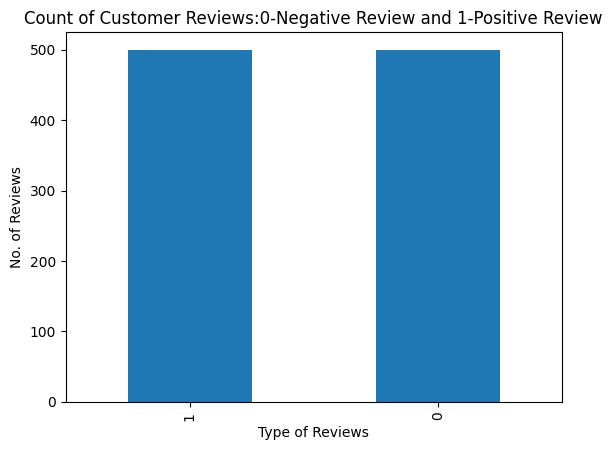

In [ ]:
import matplotlib.pyplot as plt
df['Liked'].value_counts().plot(kind ='bar')
plt.title("Count of Customer Reviews:0-Negative Review and 1-Positive Review")
plt.xlabel("Type of Reviews")
plt.ylabel("No. of Reviews")
plt.show()

In [ ]:
#The following steps can also be done but we require a numerical data for creating machine learning model using SVC,Naive Bayes.
#df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”

#some_value = The value that needs to be replaced

#value = The value that should be placed instead.
#df.loc[df["Liked"] == "0","Liked"] = "Negative"
#df.loc[df['Liked'] == "1","Liked"] = "Positive"

In [ ]:
x = df['Review'].values
y = df['Liked'].values

In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(750,)

In [ ]:
y_train.shape

(750,)

In [ ]:
x_test.shape

(250,)

In [ ]:
y_test.shape

(250,)

In [ ]:
# Applying the Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
x_train_vect.toarray() #gives a sparse representation of numbers after converting from text

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC()

In [ ]:
model1.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred1 = model1.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.72

In [ ]:
#Doing Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train_vect,y_train)
y_pred2 = model2.predict(x_test_vect)
accuracy_score(y_pred2,y_test)

0.74

In [ ]:
# PIPELINE (combines two estimators = svc+countvectorizer)
# we use pipeline so that we need not vectorize the text every time we want to predict the output
from sklearn.pipeline import make_pipeline

model3 = make_pipeline(CountVectorizer(),SVC())

model3.fit(x_train,y_train)

y_pred3 = model3.predict(x_test)
y_pred3

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.792

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model4 = MultinomialNB()

In [ ]:
model4.fit(x_train_vect,y_train)


MultinomialNB()

In [ ]:
y_pred4=model4.predict(x_test_vect)
y_pred4

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.744

In [ ]:
from sklearn.pipeline import make_pipeline

model5 = make_pipeline(CountVectorizer(),MultinomialNB())

model5.fit(x_train,y_train)

y_pred5 = model5.predict(x_test)
y_pred5

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred5,y_test)

0.784

In [ ]:
 # ACCURACY SCORES FOR ALL 4 MODELS
# SVC                       - 0.72
# SVC pipeline              - 0.792
# MultinomialNB             - 0.744
# MultinomialNB pipeline    - 0.784

In [ ]:
#Using Joblib for pipeline model to predict output of a new review
import joblib
joblib.dump(model3,'Positive-Negative') #create a file for the best model to be used for predictions

['Positive-Negative']

In [ ]:
import joblib
text_model = joblib.load('Positive-Negative')   #reloading the created joblib model for predictions
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [ ]:
text_model.predict(["I took a bad and worst food"]) # we are using joblib model to predict the output

array([0])

In [ ]:
#Here 0 - Negative Review
#     1 - Positive Review

In [ ]:
#Sentiment Analysis
#1.Sentiment analysis is a machine learning tool that analyzes texts for polarity, from positive to negative.
#2.By training machine learning tools with examples of emotions in text, machines automatically learn how to detect sentiment without human input.

#3.Machine learning allows computers to learn new tasks without being expressly programmed to perform them.
#4.Sentiment analysis models can be trained to read beyond mere definitions, to understand things like, context, sarcasm, and misapplied words.
#5.Using sentiment analysis, computers can automatically process text data and understand it just as a human would, saving hundreds of
#  employee hours.
#6.Naive Bayes is a fairly simple group of probabilistic algorithms that, for sentiment analysis classification, assigns a probability that
#  a given word or phrase should be considered positive or negative.
#7.One form of sentiment analysis is aspect-based sentiment analysis (ASBA).  Aspect-based sentiment analysis is a task in which
#  the sentiment for each aspect of an entity is determined. Aspects can be a feature, a characteristic, or behavior of a product or an entity,
#  such as the ambiance of a restaurant, the performance of a laptop, the display of a phone, and so on.
#8.NLP techniques such as bag-of-words (BoW) and term frequency-inverse document frequency (TF-IDF) can be used.
#9.Machine learning algorithms such as Support Vector Machine (SVM), Logistic Regression, Multinomial Naive Bayes, Random Forest,
#  artificial neural networks (ANN), deep learning techniques such as LSTM, bi-directional LSTM etc can also employed to create Sentiment Analysis
#  model.
#10.Sentiment analysis in social media: Social networks such as Twitter, Facebook, etc are some of the most popular places for
#   people to express their opinions about different topics. It is important for marketers to understand what customers or end-users
#   think about a product or service because this information can be used to market their campaign and help their business grow. '''

In [ ]:
#Twitter Sentiments

#1.Companies use Twitter Sentiment Analysis to develop their business strategies, to assess customers’ feelings towards products or brand,
#  how people respond to their campaigns or product launches and also why consumers are not buying certain products.
#2.In politics Sentiment Analysis Dataset Twitter is used to keep track of political views, to detect consistency and inconsistency
#  between statements and actions at the government level. Sentiment Analysis Dataset Twitter is also used for analyzing election results.
#3.Twitter sentiment analysis of customers using several advanced analytics techniques such as Machine Learning or Text analysis is
#  a way to do that.
#4.Twitter sentiment analysis, which is a subset of social media sentiment analysis, helps firms to understand their audience on
#  social channels, stay on top of what’s being said about their brand – and their rivals – and uncover new trends in the market by
#  carefully listening to the voice of the consumer on Twitter.
#5.On Twitter, there are a bazillion discussions going on — talks that have no boundaries.Politicians use Twitter to speak their
#  agendas and progress with the audience. Businesses and brands use Twitter to communicate with their customers in real-time.
#6.The amount of data generated is so voluminous that apart from user data, there is a large amount of non-useful data, often known as noise.
#  This is why it’s difficult for businesses to know which tweets to respond to initially. Twitter sentiment analysis fills this void.
#7.The Automated Machine Learning Sentiment Analysis Model has been developed to understand customer perception from the data collected
#  from Twitter. This is why sentiment analysis has become a crucial tool for social media marketing strategies.
#8.Twitter sentiment analysis can help make sense of huge amounts of data in real-time. Doing so manually would take thousands of man-hours
#  and may still be suspect to human bias and not give accurate results.
#9.Social media monitoring can not only just help businesses, it can also help politicians, sports teams, volunteer organizations, and more.
#10.Twitter sentiment analysis data can be very helpful in understanding public support for teams which can boost or suppress team morale.
#   For example, If team India is performing fantastically in cricket, the public sentiment around the team and its players is usually
#   positive.

In [ ]:
#Writing code for webapp development
!pip install streamlit
#I wrote the code after learning few things from online. The assigned mentor didn't teach us how to create webapp using joblib.But anyway,
#I tried my best.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=4488467b90470f04f2fd2940d983cc762a3fbcac24a06fbb405f35945e13bc9c
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
%%writefile app.py
import pandas as pd
import streamlit as st
import numpy as np
df=pd.read_table('/content/Restaurant_Reviews.tsv')
st.title("CUSTOMER REVIEW CLASSIFICATION")
# Load the data (similar to creating a dataframe)
rest_review=df
x = df['Review'].values
y = df['Liked'].values
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
from sklearn.pipeline import make_pipeline
model = make_pipeline(CountVectorizer(),SVC())
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
import joblib
joblib.dump(model,'Positive-Negative')
text_model = joblib.load('Positive-Negative')
review= st.text_input("Type your review: ")
result=text_model.predict(review)
output = ['Negative','Positive']
st.title(output(result[0]))




Writing app.py
